# Họ và Tên
# MSSV:

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


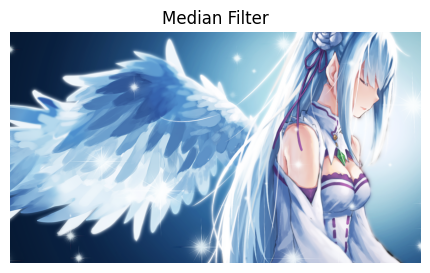

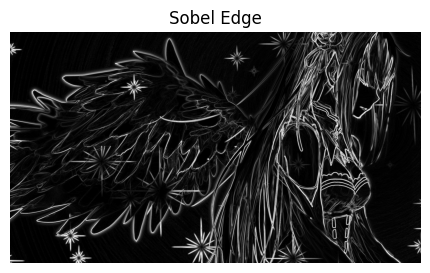

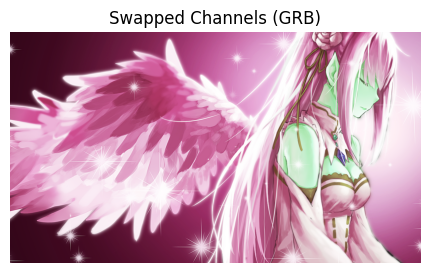

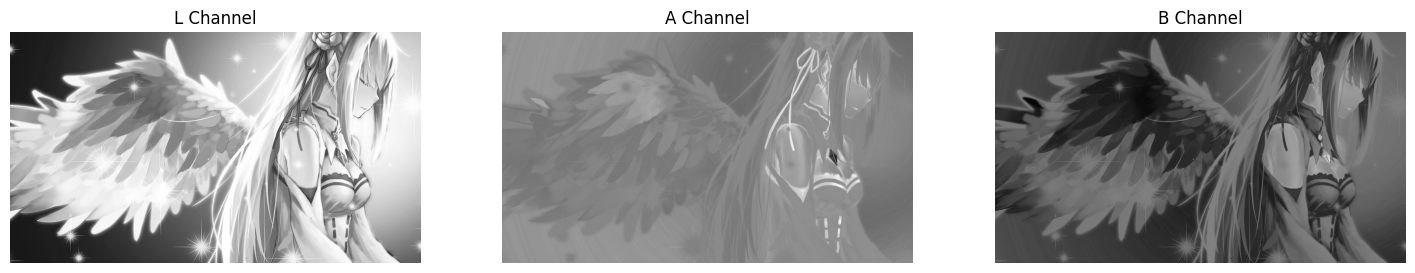

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_name = 'my_image.jpg'
img = cv2.imread(image_name)

if img is None:
    print(f"Không tìm thấy ảnh: {image_name}")
else:
    median_filtered = cv2.medianBlur(img, 5)
    cv2.imwrite(f"{image_name.split('.')[0]}_median.jpg", median_filtered)
    plt.figure(figsize=(6,3))
    plt.title('Median Filter')
    plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)
    sobel = np.uint8(np.clip(sobel, 0, 255))
    cv2.imwrite(f"{image_name.split('.')[0]}_sobel.jpg", sobel)
    plt.figure(figsize=(6,3))
    plt.title('Sobel Edge')
    plt.imshow(sobel, cmap='gray')
    plt.axis('off')
    plt.show()

    swapped = img[:, :, [1, 2, 0]]
    cv2.imwrite(f"{image_name.split('.')[0]}_swapped.jpg", swapped)
    plt.figure(figsize=(6,3))
    plt.title('Swapped Channels (GRB)')
    plt.imshow(cv2.cvtColor(swapped, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, A, B = cv2.split(lab)
    cv2.imwrite(f"{image_name.split('.')[0]}_L.jpg", L)
    cv2.imwrite(f"{image_name.split('.')[0]}_A.jpg", A)
    cv2.imwrite(f"{image_name.split('.')[0]}_B.jpg", B)
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    plt.title('L Channel')
    plt.imshow(L, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('A Channel')
    plt.imshow(A, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('B Channel')
    plt.imshow(B, cmap='gray')
    plt.axis('off')
    plt.show()

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)



Chọn phương pháp xử lý:
B: Gaussian Blur
M: Median Blur
F: Bilateral Filter
E: Canny Edge Detection
R: Erosion
D: Dilation


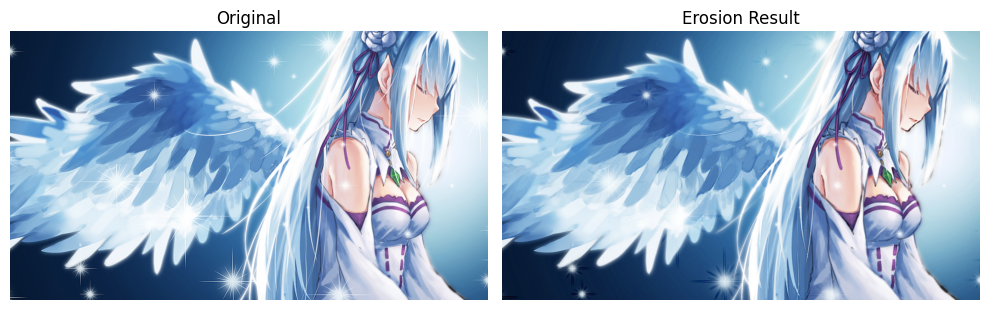

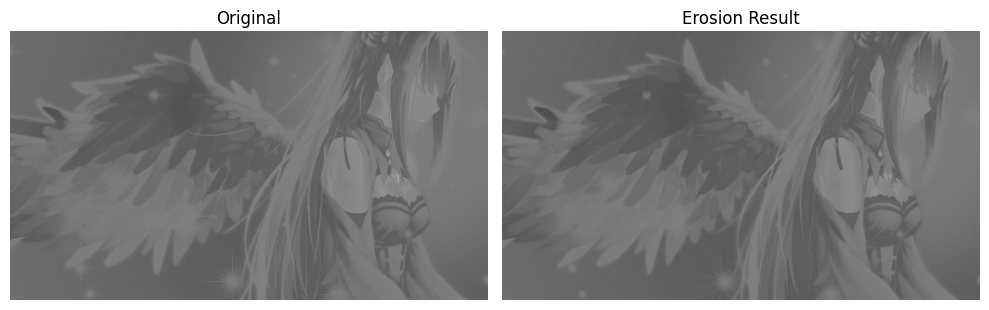

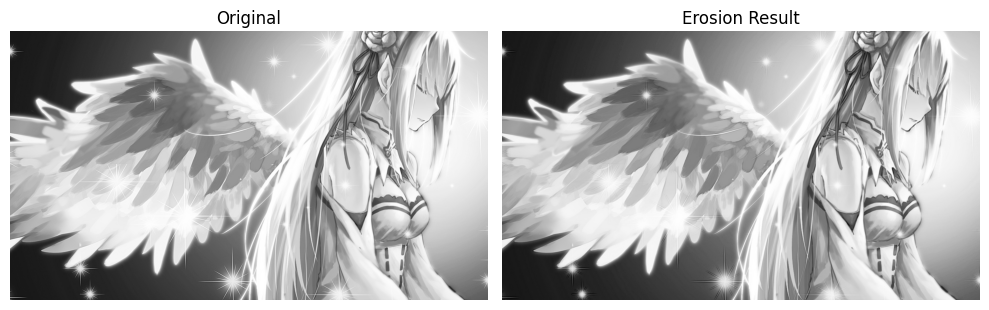

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def apply_filter(img, method, img_name):
    method = method.upper()
    result = None
    method_name = ""

    if method == 'B':  
        ksize = random.choice([3, 5, 7, 9, 11])
        result = cv2.GaussianBlur(img, (ksize, ksize), 0)
        method_name = "gaussian"

    elif method == 'M': 
        ksize = random.choice([3, 5, 7, 9, 11])
        result = cv2.medianBlur(img, ksize)
        method_name = "median"

    elif method == 'F': 
        d = random.randint(5, 15)
        sigmaColor = random.randint(50, 150)
        sigmaSpace = random.randint(50, 150)
        result = cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)
        method_name = "bilateral"

    elif method == 'E':  
        t1 = random.randint(50, 100)
        t2 = random.randint(100, 150)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        result = cv2.Canny(gray, t1, t2)
        result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR) 
        method_name = "canny"

    elif method == 'R':  
        k = random.randint(2, 5)
        kernel = np.ones((k, k), np.uint8)
        result = cv2.erode(img, kernel, iterations=1)
        method_name = "erosion"

    elif method == 'D': 
        k = random.randint(2, 5)
        kernel = np.ones((k, k), np.uint8)
        result = cv2.dilate(img, kernel, iterations=1)
        method_name = "dilation"

    else:
        print("Phím không hợp lệ.")
        return None, None

    out_name = f"result_{method_name}_{os.path.basename(img_name)}"
    cv2.imwrite(out_name, result)
    return result, method_name

image_names = []
for i in range(1, 4):
    name = input(f"Nhập tên ảnh thứ {i} (VD: anh{i}.jpg): ").strip()
    image_names.append(name)

print("\nChọn phương pháp xử lý:")
print("B: Gaussian Blur")
print("M: Median Blur")
print("F: Bilateral Filter")
print("E: Canny Edge Detection")
print("R: Erosion")
print("D: Dilation")

method_key = input("Nhập phím tương ứng: ").strip().upper()

for image_name in image_names:
    img = cv2.imread(image_name)
    if img is None:
        print(f"Không đọc được ảnh: {image_name}")
        continue

    result_img, method_used = apply_filter(img, method_key, image_name)
    if result_img is not None:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"{method_used.capitalize()} Result")
        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.show()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


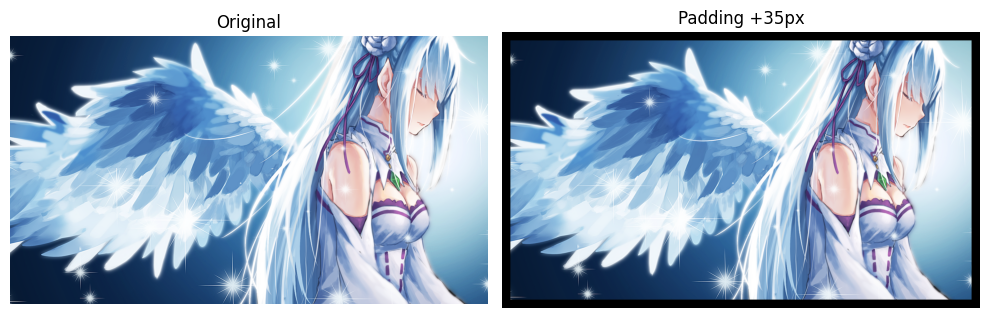

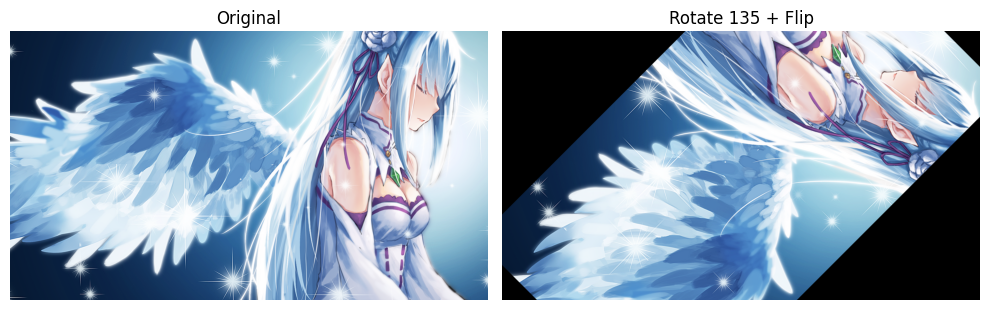

Alpha (contrast): 0.82, Beta (brightness): 32


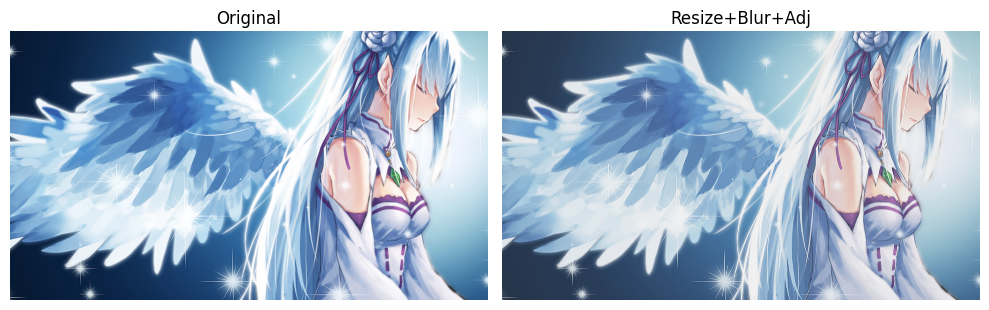

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def show_before_after(original, processed, title, img_title):
    """Hiển thị ảnh trước và sau xử lý"""
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"result_{title.lower().replace(' ', '_')}_{img_title}")
    plt.show()

image_names = []
for i in range(1, 4):
    name = input(f"Nhập tên ảnh thứ {i} (VD: anh{i}.jpg): ").strip()
    image_names.append(name)

img1 = cv2.imread(image_names[0])
if img1 is not None:
    padded = cv2.copyMakeBorder(img1, 35, 35, 35, 35, borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])
    show_before_after(img1, padded, "Padding +35px", os.path.basename(image_names[0]))
else:
    print(f"Không đọc được ảnh: {image_names[0]}")

img2 = cv2.imread(image_names[1])
if img2 is not None:
    (h, w) = img2.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 135, 1.0)
    rotated = cv2.warpAffine(img2, M, (w, h))
    flipped = cv2.flip(rotated, 1)  
    show_before_after(img2, flipped, "Rotate 135 + Flip", os.path.basename(image_names[1]))
else:
    print(f"Không đọc được ảnh: {image_names[1]}")

img3 = cv2.imread(image_names[2])
if img3 is not None:
    resized = cv2.resize(img3, (img3.shape[1]*5, img3.shape[0]*5), interpolation=cv2.INTER_LINEAR)

    blurred = cv2.GaussianBlur(resized, (9, 9), 0)

    alpha = random.uniform(0.5, 2.0)    
    beta = random.randint(-50, 50)      

    adjusted = cv2.convertScaleAbs(blurred, alpha=alpha, beta=beta)

    print(f"Alpha (contrast): {alpha:.2f}, Beta (brightness): {beta}")

    show_before_after(img3, adjusted, "Resize+Blur+Adj", os.path.basename(image_names[2]))
else:
    print(f"Không đọc được ảnh: {image_names[2]}")


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.